In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense


In [73]:
!pip install lightgbm
!pip install tensorflow

In [43]:
pip install --upgrade lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
os.chdir('C:\\Users\\vaish\\Downloads\\SupplyChain')

In [4]:
df = pd.read_csv('supplyData.zip')

In [5]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [6]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [7]:
df.describe(include=['O'])

,Product type,SKU,Customer demographics,Shipping carriers,Supplier name,Location,Inspection results,Transportation modes,Routes
count,100,100,100,100,100,100,100,100,100
unique,3,100,4,3,5,5,3,4,3
top,skincare,SKU0,Unknown,Carrier B,Supplier 1,Kolkata,Pending,Road,Route A
freq,40,1,31,43,27,25,41,29,43


In [8]:
#clean data
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [9]:
#df.isnull().sum() shows if any of the categories have missing values so since it doesnt. our data is clean

Text(0.5, 1.0, 'Total Revenue')

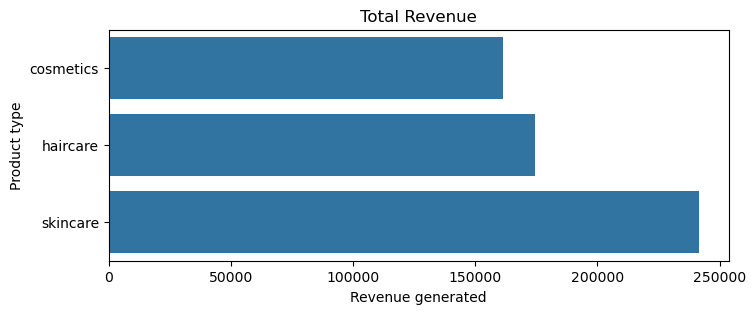

In [10]:
#find the sum of each product type and then sort it 
revenue = df[['Product type','Revenue generated']].groupby(['Product type'],as_index=False).sum()
revSort = revenue.sort_values(by=['Revenue generated'],ascending = True)

#create a subplot to display the results
fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(revSort, x='Revenue generated', y='Product type')
ax.set_title('Total Revenue')

In [11]:
#find which row has the word "fail"
suppliers = df[['Supplier name']].value_counts().to_frame('supply items').reset_index()
fail = df.loc[df['Inspection results']=='Fail']
fail_s = fail[['Supplier name']].value_counts().to_frame('fail count').reset_index()
fail_s = pd.merge(fail_s, suppliers,on='Supplier name')
fail_s['fail rate']=fail_s['fail count']/fail_s['supply items']
fail_s.sort_values(by='fail rate',ascending=False)

,Supplier name,fail count,supply items,fail rate
0,Supplier 4,12,18,0.666667
2,Supplier 5,7,18,0.388889
1,Supplier 2,8,22,0.363636
3,Supplier 1,6,27,0.222222
4,Supplier 3,3,15,0.200000


In [12]:
#creates a condition where availability has to be less than the stock and uses loc to only choose rows where this condition is true
need_order = df.loc[df['Availability']<df['Stock levels']]

# below stock levels but fail in inspection
need_order_f = df.loc[(df['Availability']<df['Stock levels'])&(df['Inspection results']=='Fail')]
print('Need to order but fail in inspection:',need_order_f.shape[0])

# below stock levels but pending in inspection
need_order_Pending = df.loc[(df['Availability']<df['Stock levels'])&(df['Inspection results']=='Pending')]
print('Need to order but pending in inspection:',need_order_Pending.shape[0])

# below stock levels and pass in inspection
need_order_Pass = df.loc[(df['Availability']<df['Stock levels'])&(df['Inspection results']=='Pass')]
print('Need to order and pass in inspection:',need_order_Pass.shape[0])

Need to order but fail in inspection: 15
Need to order but pending in inspection: 23
Need to order and pass in inspection: 13


<Figure size 1000x800 with 0 Axes>

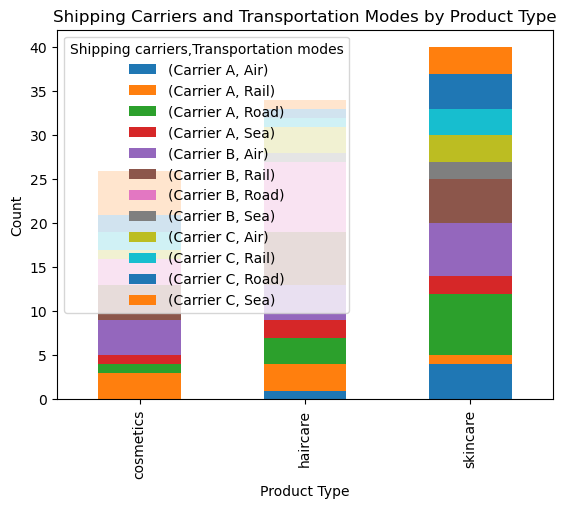

In [13]:
plt.figure(figsize=(10,8))
pd.crosstab(df['Product type'], [df['Shipping carriers'], df['Transportation modes']]).plot(kind='bar', stacked=True)
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Shipping Carriers and Transportation Modes by Product Type')
plt.show()

Text(0.5, 1.0, 'Shipping Costs by Transportation Mode')

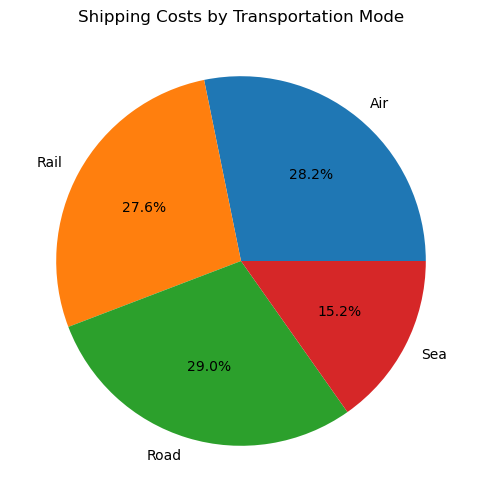

In [14]:
# group the data by transportation modes and calculate the total shipping costs for each mode
transportation_costs = df.groupby('Transportation modes')['Shipping costs'].sum()

# plot a pie chart of the shipping costs by transportation mode
plt.figure(figsize=(8,6))
plt.pie(transportation_costs, labels=transportation_costs.index, autopct='%1.1f%%')
plt.title('Shipping Costs by Transportation Mode')

In [15]:
#optimizng the supply chain

In [16]:
X = df.loc[:,['Price', 'Availability', 'Stock levels', 'Lead times', 'Order quantities']]
y = df.loc[:,'Number of products sold']

#split data into 9 diff parts and use last part for validation
num_folds = 10

In [17]:
#mse = mean squared error. Tells us squared differenece between predicted vs actual value
mse_scores = []
#rmse = Root Mean Squared Error. Same as mse but penalizes larger outliers 
rmse_scores = []
#mae = mean absolute error.FInds absolute distance for accuracy
mae_scores = []
#r2 = r sqaured. another accuracy test  is valuable for understanding the overall fit of the model.
r2_scores = []

In [18]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
#splits data into 10 folds, shuffles data to avoid bias,sets a seed for the random number generator used for shuffling the data

In [19]:
#dictionary that will create parameters for the LightGBM model.
#LGBN is a machine learning framework that uses tree based learning 
params = {
    'objective': 'regression',
    'metric': 'mean_squared_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [49]:
print(lgb.__version__)

4.5.0


In [81]:
from catboost import CatBoostRegressor

mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train the model
    model = CatBoostRegressor(
        iterations=100,
        depth=10,
        learning_rate=0.05,
        loss_function='RMSE',
        early_stopping_rounds=5,
        verbose=10
    )
    model.fit(X_train, y_train, eval_set=(X_test, y_test))
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate the target range
    target_range = np.max(y_test) - np.min(y_test)

    # Calculate metrics as percentages
    percentage_mse = (mse / target_range) * 100
    percentage_rmse = (rmse / target_range) * 100
    percentage_mae = (mae / target_range) * 100
    percentage_r2 = (r2 * 100)

    # Append the scores to the respective lists
    mse_scores.append(percentage_mse)
    rmse_scores.append(percentage_rmse)
    mae_scores.append(percentage_mae)
    r2_scores.append(percentage_r2)

0:	learn: 287.6651151	test: 393.0796752	best: 393.0796752 (0)	total: 14.5ms	remaining: 1.44s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 393.0796752
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 307.2268123	test: 207.3840392	best: 207.3840392 (0)	total: 15.2ms	remaining: 1.51s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 206.0950722
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 301.2270365	test: 279.6279380	best: 279.6279380 (0)	total: 11.4ms	remaining: 1.13s
Stopped by overfitting detector  (5 iterations wait)

bestTest = 279.627938
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 298.2318112	test: 309.2442707	best: 309.2442707 (0)	total: 9.18ms	remaining: 908ms
Stopped by overfitting detector  (5 iterations wait)

bestTest = 309.2442707
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 304.8540088	test: 240.3733784	best: 240.3733784 (0)	total: 8.07ms	remaining: 799ms
Stopped 

In [79]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/101.1 MB 1.2 MB/s eta 0:01:26
   ---------------------------------------- 0.2/101.1 MB 2.0 MB/s eta 0:00:52
   ---------------------------------------- 0.6/101.1 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.8/101.1 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 1.2/101.1 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.8/101.1 MB 5.6 MB/s eta 0:00:18
    --------------------------------------- 2.0/101.1 MB 5.7 MB/s eta 0:00:18
    --------------------------------------- 2.4/101.1 MB 6.2 MB/s eta 0:00:16
   - -------------------------------------- 2.7/101.1 MB 6.5 MB/s eta 0:00:16
   - -------------------------------------- 3.2/101.1 MB 6.6 MB/s eta 0:00:1

In [84]:
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)

# Print the results
print(f"Average Mean Squared Error: {avg_mse:.2f}%")
print(f"Average Root Mean Squared Error: {avg_rmse:.2f}%")
print(f"Average Mean Absolute Error: {avg_mae:.2f}%")
print(f"Average R-squared: {avg_r2:.2f}%")

Average Mean Squared Error: 10611.31%
Average Root Mean Squared Error: 35.02%
Average Mean Absolute Error: 31.39%
Average R-squared: -6.49%


In [88]:
# Extract the features (X) and target (y)
X = df.loc[:, 'Production volumes'].values.reshape(-1, 1)
y = df.loc[:, 'Manufacturing costs'].values
num_folds = 5

In [90]:
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

from sklearn.preprocessing import MinMaxScaler

# Initialize and fit the scaler to the data
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [92]:
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [131]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Example data preparation
X = np.random.rand(1000, 10)  # Replace with actual feature data
y = np.random.rand(1000)      # Replace with actual target data

kf = KFold(n_splits=5)        # Define the k-fold cross-validation

mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define and compile the neural network model
    model = tf.keras.Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define Early Stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Define Model Checkpoint callback to save the best model
    model_checkpoint = ModelCheckpoint(
        'best_model.keras',  # Save the entire model
        save_best_only=True,
        save_weights_only=False,  # Save the entire model
        monitor='val_loss',
        mode='min',
        verbose=1
    )

    # Train the model on the training data with callbacks
    history = model.fit(
        X_train_scaled,
        y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, model_checkpoint]
    )

    # Load the best model weights from the saved checkpoint
    model.load_weights('best_model.keras')
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate metrics as percentages
    target_range = np.max(y_test) - np.min(y_test)
    percentage_mse = (mse / target_range) * 100
    percentage_rmse = (rmse / target_range) * 100
    percentage_mae = (mae / target_range) * 100
    percentage_r2 = r2 * 100

    # Append the scores to the respective lists
    mse_scores.append(percentage_mse)
    rmse_scores.append(percentage_rmse)
    mae_scores.append(percentage_mae)
    r2_scores.append(percentage_r2)

# Print average scores across folds
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
print("Average R2:", np.mean(r2_scores))
         


Epoch 1/100


C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2385 
Epoch 1: val_loss improved from inf to 0.10591, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2151 - val_loss: 0.1059
Epoch 2/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1104 
Epoch 2: val_loss improved from 0.10591 to 0.09562, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1095 - val_loss: 0.0956
Epoch 3/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0996 
Epoch 3: val_loss improved from 0.09562 to 0.09514, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0992 - val_loss: 0.0951
Epoch 4/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0936  
Epoch 4: val_loss improved from 0.09514 to 0.09130, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0927 - val_loss: 0.0913
Epoch 5/100
10/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0850  
Epoch 5: val_loss improved from 0.09130 to 0.0

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2232 
Epoch 1: val_loss improved from inf to 0.11961, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2119 - val_loss: 0.1196
Epoch 2/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0970 
Epoch 2: val_loss improved from 0.11961 to 0.10639, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0971 - val_loss: 0.1064
Epoch 3/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0886  
Epoch 3: val_loss improved from 0.10639 to 0.10344, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0888 - val_loss: 0.1034
Epoch 4/100
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0784 
Epoch 4: val_loss did not improve from 0.10344
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - val_loss: 0.1037
Epoch 5/100
13/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0836  
Epoch 5: val_loss improved from 0.10344 to 0.10163, saving model to best_model.keras

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2769 
Epoch 1: val_loss improved from inf to 0.13291, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.2453 - val_loss: 0.1329
Epoch 2/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1046 
Epoch 2: val_loss improved from 0.13291 to 0.12202, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1049 - val_loss: 0.1220
Epoch 3/100
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0903  
Epoch 3: val_loss improved from 0.12202 to 0.11713, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0923 - val_loss: 0.1171
Epoch 4/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0852 
Epoch 4: val_loss did not improve from 0.11713
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - val_loss: 0.1175
Epoch 5/100
13/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0842  
Epoch 5: val_loss improved from 0.11713 to 0.11549, saving model to best_model.kera

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2438 
Epoch 1: val_loss improved from inf to 0.11341, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.2183 - val_loss: 0.1134
Epoch 2/100
13/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1079 
Epoch 2: val_loss improved from 0.11341 to 0.10053, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1101 - val_loss: 0.1005
Epoch 3/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0950 
Epoch 3: val_loss improved from 0.10053 to 0.09662, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0953 - val_loss: 0.0966
Epoch 4/100
17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0929  
Epoch 4: val_loss did not improve from 0.09662
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0914 - val_loss: 0.0973
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0800 
Epoch 5: val_loss improved from 0.09662 to 0.09454, saving model to best_model.keras

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2601 
Epoch 1: val_loss improved from inf to 0.10969, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.2272 - val_loss: 0.1097
Epoch 2/100
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1175 
Epoch 2: val_loss improved from 0.10969 to 0.09959, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1140 - val_loss: 0.0996
Epoch 3/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1014
Epoch 3: val_loss improved from 0.09959 to 0.09946, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1010 - val_loss: 0.0995
Epoch 4/100
14/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0911 
Epoch 4: val_loss improved from 0.09946 to 0.09933, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0902 - val_loss: 0.0993
Epoch 5/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0860 
Epoch 5: val_loss improved from 0.09933 to 0.097

In [132]:
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_r2 = np.mean(r2_scores)

# Print the results
print(f"Average Mean Squared Error: {avg_mse:.2f}%")
print(f"Average Root Mean Squared Error: {avg_rmse:.2f}%")
print(f"Average Mean Absolute Error: {avg_mae:.2f}%")
print(f"Average R-squared: {avg_r2:.2f}%")

Average Mean Squared Error: 10.04%
Average Root Mean Squared Error: 31.84%
Average Mean Absolute Error: 26.63%
Average R-squared: -19.72%


In [145]:
min_production_volume = df['Production volumes'].min()
max_production_volume = 1000
step_size = 100

cheapest_cost = float('inf')
best_production_volume = None

for production_volume in range(min_production_volume, max_production_volume + 1, step_size):
    normalized_production_volume = scaler.transform(np.array([[production_volume]]))
    predicted_cost = model.predict(normalized_production_volume)

    if predicted_cost[0][0] < cheapest_cost:
        cheapest_cost = predicted_cost[0][0]
        best_production_volume = production_volume

print('Most optimal production volume to minimize manufacturing cost:', best_production_volume)
print('The cheapest manufacturing cost:', cheapest_cost)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Most optimal production volume to minimize manufacturing cost: 1000
The cheapest manufacturing cost: -0.19072433
